In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/home/junior/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py)

In [18]:
# Create a synthetic dataset
X, y = make_classification(
    n_classes=2, 
    class_sep=2, 
    weights=[0.1, 0.9], 
    n_informative=2,  # Changed from 3 to 2 to match n_features
    n_redundant=0, 
    flip_y=0,
    n_features=2,  # Total features remains the same
    n_clusters_per_class=1, 
    n_samples=100, 
    random_state=42
)


In [19]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

In [20]:
# Count of each class before SMOTE
print("Before SMOTE:")
print(df['Target'].value_counts())

Before SMOTE:
1    90
0    10
Name: Target, dtype: int64


In [15]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4a701aaca0>
Traceback (most recent call last):
  File "/home/junior/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    def switch_backend(self, backend):
  File "/home/junior/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    # Controllers for the libraries that we'll look for in the loaded libraries.
  File "/home/junior/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    """Return an instance of this class that can be used as a decorator"""
  File "/home/junior/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    num_threads[user_api] = limit
AttributeError: 'NoneType' object has no attribute 'split'


In [16]:
# Count of each class after SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_res).value_counts())


After SMOTE:
1    90
0    90
dtype: int64


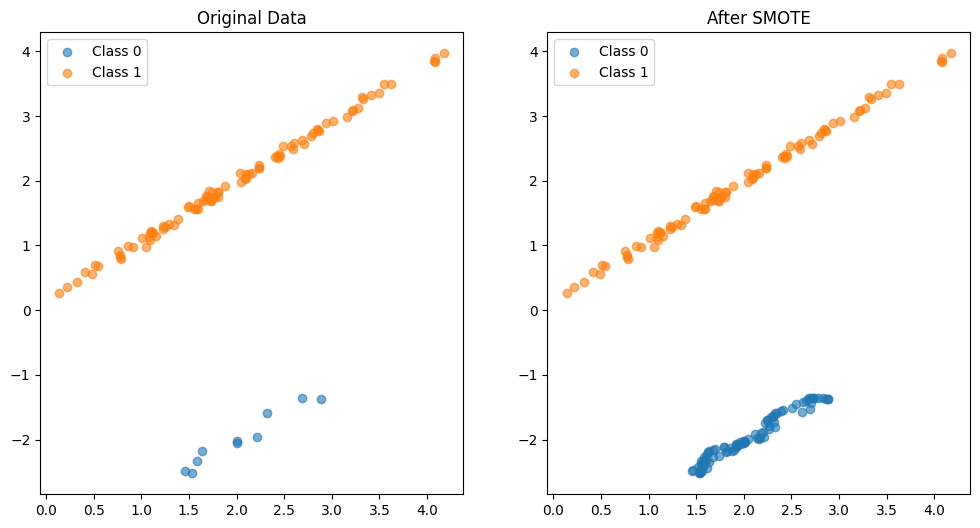

In [17]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
ax[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6)
ax[0].set_title('Original Data')
ax[0].legend()

ax[1].scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Class 0', alpha=0.6)
ax[1].scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Class 1', alpha=0.6)
ax[1].set_title('After SMOTE')
ax[1].legend()